# OpenCV Face Detection HDMI

In this notebook, opencv face detection will be applied to HDMI input images.

To run all cells in this notebook a HDMI input source and HDMI output monitor are required.  

References:

https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

### Step 1: Load the overlay

In [1]:
from pynq import Overlay
Overlay("base.bit").download()

### Step 2: Initialize HDMI I/O

In [2]:
from pynq.drivers.video import HDMI
hdmi_out = HDMI('out', video_mode=HDMI.VMODE_1920x1080)
hdmi_in = HDMI('in', init_timeout=10, frame_list=hdmi_out.frame_list)
hdmi_in.start()
hdmi_out.start()

### Step 3:Show input frame using IPython Image
Source: http://www.gardnerproductions.ca/wp-content/uploads/2015/10/bigstock-People-with-different-emotions-102991475.jpg

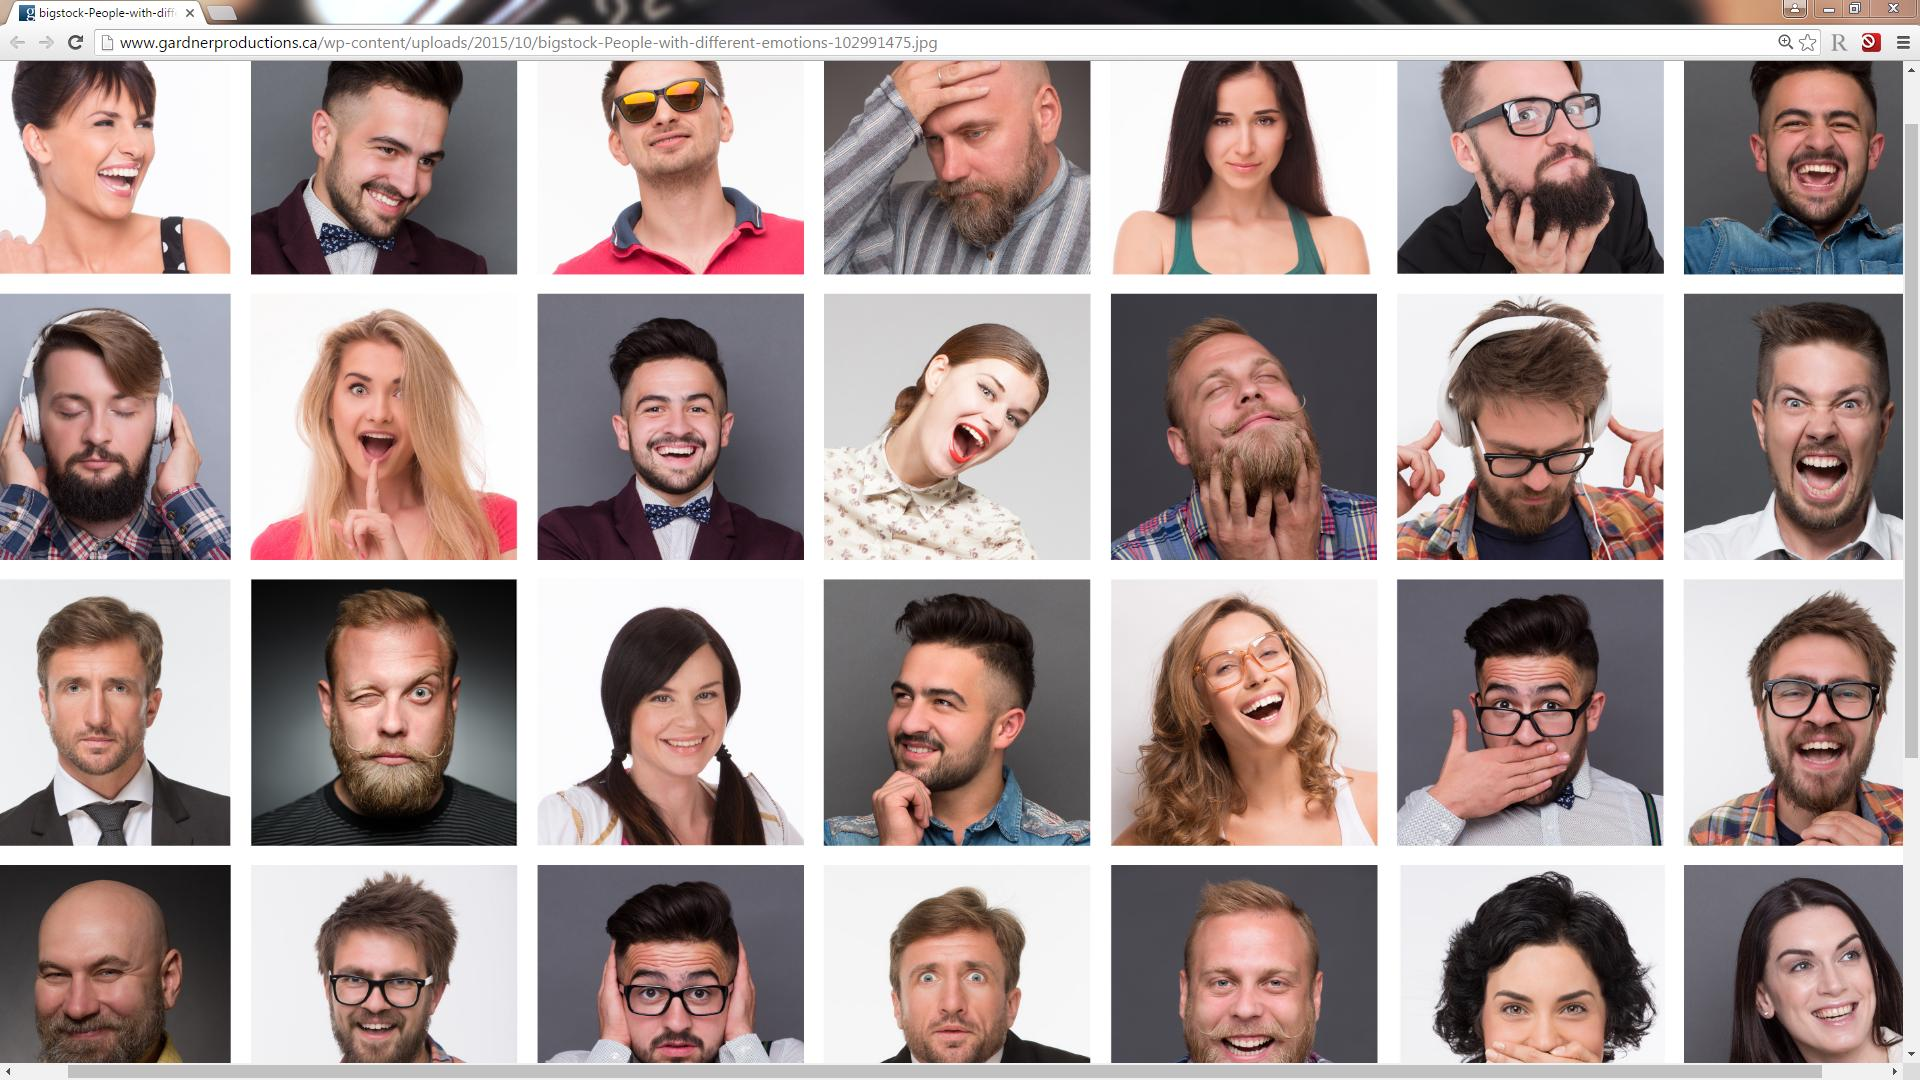

In [3]:
from IPython.display import Image
frame = hdmi_in.frame()
orig_img_path = '/home/xilinx/jupyter_notebooks/Examples/data/face_detect.jpg'
frame.save_as_jpeg(orig_img_path)

Image(filename=orig_img_path)

### Step 4: Apply the face detection to the input

In [4]:
import cv2
import numpy as np

frame = hdmi_in.frame_raw()
np_frame= (np.frombuffer(frame, dtype=np.uint8)).reshape(1080,1920,3)

face_cascade = cv2.CascadeClassifier(
                    './data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
                    './data/haarcascade_eye.xml')

gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = np_frame[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

### Step 5: Disconnect HDMI out from HDMI in
The `hdmi_in` will now stream to different frame buffer (no longer connected to `hdmi_out`).

In [5]:
hdmi_in.frame_index_next()

1

### Step 6: Show results on HDMI output
Output OpenCV results via HDMI.

In [6]:
hdmi_out.frame_raw(bytearray(np_frame))

### Step 7: Show results within notebook
Output OpenCV results as JPEG.

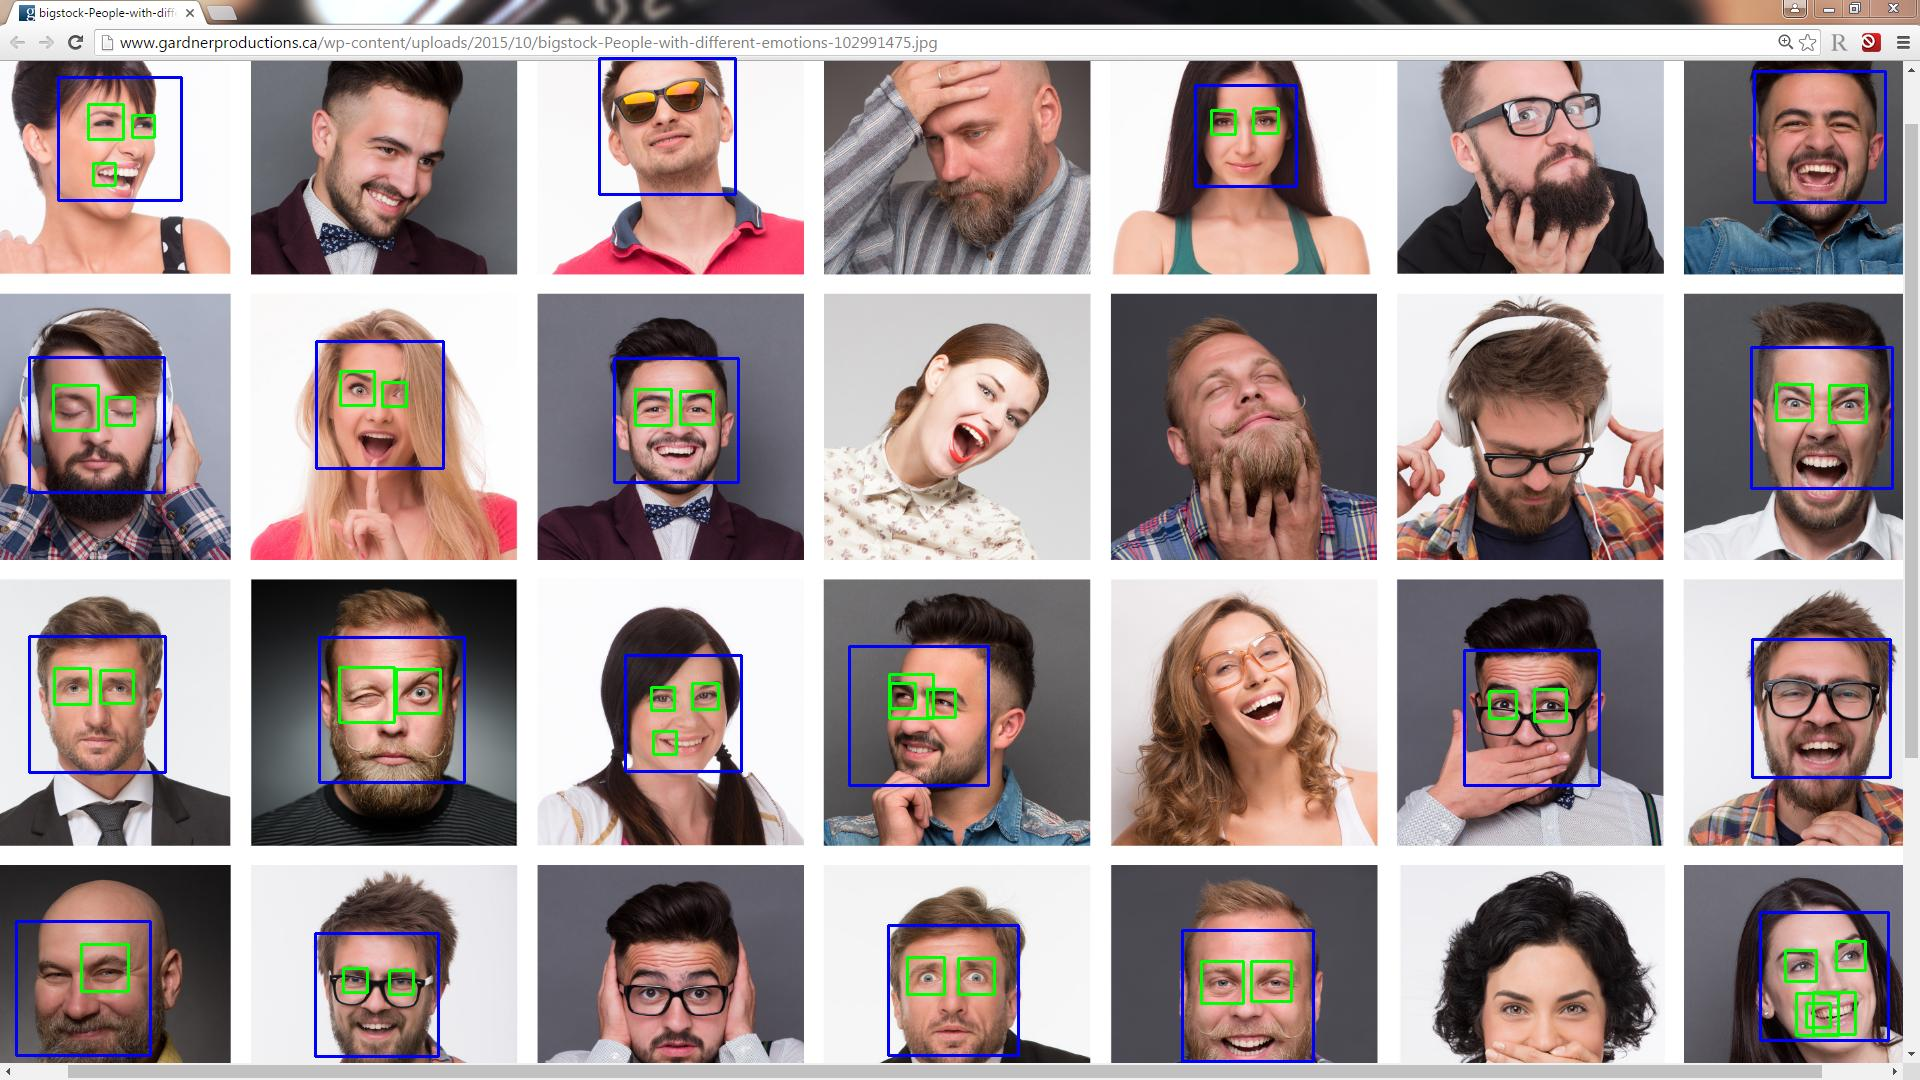

In [7]:
orig_img_path = '/home/xilinx/jupyter_notebooks/Examples/data/face_detect.jpg'
hdmi_out.frame().save_as_jpeg(orig_img_path)
Image(filename=orig_img_path)

### Step 7: Release HDMI

In [8]:
hdmi_out.stop()
hdmi_in.stop()
del hdmi_in, hdmi_out